# **Iris Data Classification**


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# https://raw.githubusercontent.com/akmalatnamal/davlab8/main/IRIS.csv
# IRIS Dataset
df = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab8/main/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

The dataset used here is called the Iris dataset. This dataset has several features such as sepal length, sepal width based on which we predict which of the iris species that particular flower belongs to.


Read the IRIS.csv file into a pandas dataframe.

Assign the predictor and response variables. Remember the aim is to predict the iris species

Standardise the predictor variables using StandardScalar.

Split the dataset into train and validation sets, with 80% of the data for training

Fit a logistic regression model to the dataset

Compute and print the train and validation accuracy

Perform 10 fold cross-validation. Compute and print the accuracy.

In [6]:

x = df.drop('species',axis = 1)
# standardization of dependent variables
scalar = StandardScaler()
x = scalar.fit_transform(x)
y = df['species']
pd.DataFrame(x).head()




,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [7]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state = 41)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred_acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is:{y_pred_acc *100}%')

Accuracy of the model is:90.0%


In [10]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
x_pred = logreg.predict(x_train)
x_train_acc = accuracy_score(y_train,x_pred)
print(f'Accuracy of the model is:{x_train_acc*100}%')

Accuracy of the model is:97.5%


In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]])

In [12]:
import seaborn as sns


<AxesSubplot:>

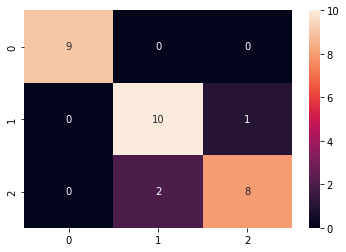

In [13]:
sns.heatmap(cm, annot = True)

In [15]:
# Testing
sample = x_train[0].reshape(1,-1)
logreg.predict(sample)

array(['Iris-versicolor'], dtype=object)